In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=None,test_split=0.2)
# 이 데이터셋 같은 경우에는 이미 array 배열로 단어 --> 숫자인덱스 정리가 되어있음!
# num_words = n --> 등장빈도 순위로 n번째 까지의 단어까지만 사용할지 조절

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print('훈련용 뉴스 기사 : ',len(X_train))
print('훈련용 뉴스 기사 : ',len(X_test))
num_classes = max(y_train) + 1
# y_train은 0~45까지의 값을 가짐 --> 총 개수를 알기 위해 +1 해줌
print('카테고리(label) 개수 : ',num_classes)

훈련용 뉴스 기사 :  8982
훈련용 뉴스 기사 :  2246
카테고리(label) 개수 :  46


뉴스 기사 최대길이 :  2376
뉴스 기사 평균길이 :  145.5398574927633


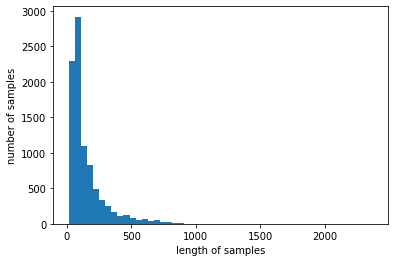

In [5]:
print('뉴스 기사 최대길이 : ',max(len(l) for l in X_train))
print('뉴스 기사 평균길이 : ',sum(map(len,X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
# 최대 길이 2376 / 평균 길이 : 145.5
# 대부분 100~200 사이의 길이(1000이하)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


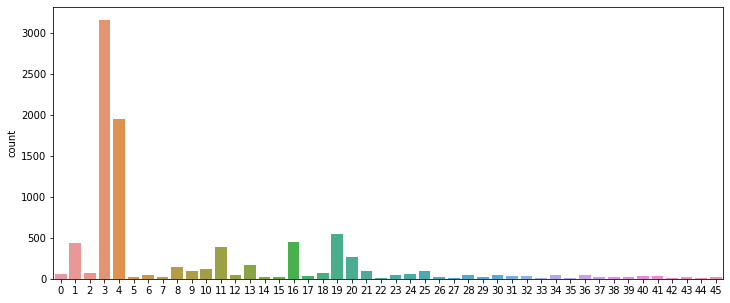

In [6]:
fig,axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)
# 3과 4가 많은 레이블을 차지

In [7]:
unique_elements,counts_elements = np.unique(y_train,return_counts=True)
print('각 카테고리별 빈도수: ')
print(np.asarray((unique_elements,counts_elements)))

각 카테고리별 빈도수: 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [8]:
# train 데이터셋 중 어떤 단어에 어떤 인덱스가 부여되었는지 확인하는 코드
index_to_word = {}
num = 10
word_to_index = reuters.get_word_index()
for key,value in word_to_index.items():
    index_to_word[value] = key
print(f'빈도수 상위 {num}번째 단어 : ',index_to_word[num])

565248/550378 [==============================] - 0s 0us/step
빈도수 상위 10번째 단어 :  for


In [9]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
max_len = 2376
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)
y_train = to_categorical(y_train)  # label 원 핫 인코딩 --> keras에서 사용하는 방식
y_test = to_categorical(y_test)    # label 원 핫 인코딩

In [10]:
es = EarlyStopping(patience=4,monitor='val_loss',mode='min',verbose=1)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)
model = Sequential()
model.add(Embedding(1000,120))
model.add(LSTM(120))
model.add(Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))


Epoch 1/30
71/71 [==============================] - 53s 648ms/step - loss: 2.6190 - acc: 0.3372 - val_loss: 2.4180 - val_acc: 0.3620

Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
Epoch 2/30
71/71 [==============================] - 46s 642ms/step - loss: 2.2628 - acc: 0.4063 - val_loss: 2.0355 - val_acc: 0.4969

Epoch 00002: val_acc improved from 0.36198 to 0.49688, saving model to best_model.h5
Epoch 3/30
71/71 [==============================] - 46s 642ms/step - loss: 1.9462 - acc: 0.4961 - val_loss: 1.8558 - val_acc: 0.5138

Epoch 00003: val_acc improved from 0.49688 to 0.51380, saving model to best_model.h5
Epoch 4/30
71/71 [==============================] - 46s 645ms/step - loss: 1.8155 - acc: 0.5269 - val_loss: 2.0842 - val_acc: 0.4047

Epoch 00004: val_acc did not improve from 0.51380
Epoch 5/30
71/71 [==============================] - 46s 647ms/step - loss: 1.7742 - acc: 0.5313 - val_loss: 1.7639 - val_acc: 0.5463

Epoch 00005: val_acc improve

In [11]:
loaded_model = load_model('best_model.h5')
print('테스트 정확도 : ',loaded_model.evaluate(X_test,y_test)[1])

71/71 [==============================] - 11s 147ms/step - loss: 1.0713 - acc: 0.7418
테스트 정확도 :  0.7417631149291992


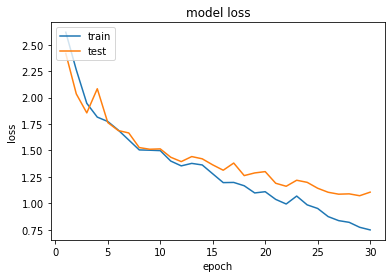

In [12]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# 20을 넘어갈 즈음부터 과적합 신호가 나타남

In [13]:
import tensorflow as tf

In [14]:
tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [15]:
tf.debugging.set_log_device_placement(True)

# 텐서를 CPU에 할당
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
